이번 장은 저번 장에서 배운 perceptron의 가중치이 어떠한 절차를 통하여 결정되는지에 대하여 공부할 것이다.

각각의 입령층으로 부터 나온 값들은 활성화 함수를 거친다. 그래야 0 또는 1 로 출력되기 때문이다.
이러한 활성화 함수는 여러가지가 있는데 하나하나 구현해 보면서 어떠한 특징이 있는지 알아보도록 하겠다.

1. 활성화 함수

1-1. 계단 함수이다.
    입력이 0을 넘으면 1을 출력하고
    그 외에는 0을 출력하는 함수이다.

In [178]:
def step_function1(x):
    if x>0:
        return 1
    else:
        return 0

하지만 이런식으로 구현하게 되면 넘파이 배열을 입력받지 못하게 된다.
넘파이 배여을 입력받기 위하여 우리는 코드를 다음과 같이 수정할 수 있다.
이때, x는 넘파이 배열이다.

In [179]:
import numpy as np
def step_function2(x):
    y = x > 0
    return y.astype(np.int0)

x = np.array([-1.,1.,2.])
print(step_function2(x))

[0 1 1]


이제 앞에서 정의한 계단 함수를 그래프로 그려볼것이다.
참고로 코드를 다음과 같이 더 줄일 수 도 있다.

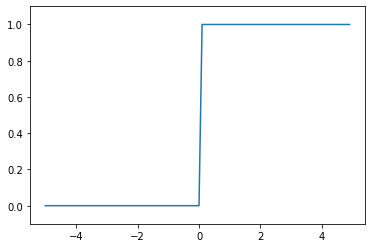

In [180]:
import numpy as np
import matplotlib.pylab as plt

def step_function3(x):
    return np.array(x>0,dtype =np.int0)

x = np.arange(-5.0,5.0,0.1)
y = step_function3(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()
    

1-2. 그 다음으로는 시그모이드 함수를 구현해보고자 한다.
    시그모이드는 수식을 통하여 쉽게 구현할 수 있다.
    특이하게도 본 함수는 넘파이 배열을 입력받아 올바른 형태로 출력이 가능하다.
    그 이유는 넘파이의 브로드 캐스트에 존재한다. 
    실재로 그런지 확인하면서 예제를 통해 복습 해보자.

In [181]:
def sigmoid(x):
    sig = np.where(x<0,np.exp(x)/(1+np.exp(x)) ,1/(1+np.exp(-x)))
    return sig

x = np.array([-1.0,1.0,2.0])
print(sigmoid(x))

[0.26894142 0.73105858 0.88079708]


In [182]:
t = np.array([1.0,2.0,3.0])
print(1.0+t)
print(1.0/t)

[2. 3. 4.]
[1.         0.5        0.33333333]


다음과 같이 브로드캐스드가 잘 이루어지는 모습을 확인할 수 있다.
이제는 시그모이드 함수를 시각화 해보자.

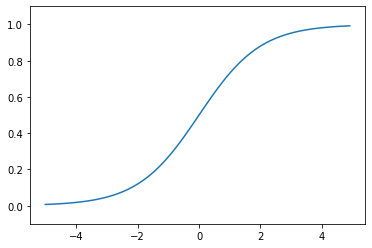

In [183]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

1-3. 이제 계단 함수와 시그모이드 함수를 비교해보자.

차이점)
    가장 먼저 시각적으로 연속성의 차이가 보일 것이다.
    이 연속성에 의하여 반환 값에도 차이가 존재한다.
    시그모이드 함수는 실수를 반환하는 반면
    계단 함수는 오직 0 또는 1만을 반환한다.

공통점)
    입력이 중요하면 큰 값을 출력 중요치 않으면 작은 값 출력
    입력의 값이 아무리 크거나 작아도 0 에서 1사이의 값을 반환
    비선형 함수이다.

1-4. 비선형 함수
    비선형 함수란 선형이 아닌 함수이다.
    선형 함수란
    입력의 상수배만큼 변하는 함수를 선형 함수 라고 한다.

신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다.
달리 말하면 선형 함수여서는 안된다는 것인데 왜 그런 것일까?
왜냐하면 층을 깊게 하는 의미가 없어지기 때문이다.

한층에서도 구현이 가능한 것을 굳이 여러 층을 나눠 구현할 이유가 없는 것이다.

1-5. ReLU 함수
    본 함수는 입력이 0을 넘으면 그 입력을 그대로 출력하고,
    0 이하면 0을 출력하는 함수이다.
    본 함수는 다음과 같이 간단히 구현된다.

In [184]:
def ReLU(x):
    return np.maximum(0,x) # 둘개의 입력 값 중 큰 값을 반환하는 함수

2. 다차원 배열의 계산

2-1. 다차원 배열
    결국 숫자의 배열이다. 하지만 그 형태에 차이가 존재하는 것이다.
    1열, 직사각형 배열, n차원 배열 등등.
    이제 넘파이를 이용하여 다차원 배열을 작성해볼 것 이다.

In [185]:
A = np.array([1,2,3,4]) # 1차원 배열

print(A)
print(np.ndim(A))       # 차원 수 확인
print(A.shape)          # 형태 확인, 튜플로 반환
print(A.shape[0])   

[1 2 3 4]
1
(4,)
4


In [186]:
B = np.array([[1,2],[3,4],[5,6]])

print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


B의 shape을 보면 3,2이라고 되어있다.
첫 차원의 원소가 3개 
두번째 차원의 원소가 2개 라는 뜻이다.

참고로 2차원 배열은 특히 행렬이라고 부르며
가로 방향을 행
세로 방향을 열이라고 한다.

2-2. 행렬 곱
    여기서 말하는 곱은 dot이다.
    따라서 (a,b)의 행렬과 (b,d)와 같이
    앞의 열의 개수와 뒤의 행의 개수가 동일하여야 계산이 가능하다.
    그리고 계산 결과의 형태는 (a,d)로 결정 되게 된다.
    코드를 통해 확인 해보자

In [187]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])

print(A.shape)
print(B.shape)

print(np.dot(A,B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


과연 내적은 교환법칙이 성립할까?
다음 코드를 보며 확인해보자.

In [188]:
print(np.dot(A,B))
print(np.dot(B,A))

[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


당연히 곱해지는 상대가 달라지니 성립하지 않는 것을 확인할 수 있다.

2-3. 신경망에서의 행렬 곱
    넘파이 행렬을 사용하여 그림 3-14의 신경망을 구현해보자
    (1,2) dot (2,3) = (1,3) 의 형태로 출력될 것 이다.
    이제 구현 해보자.

In [189]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])
Y = np.dot(X,W)

print(Y)

[ 5 11 17]


3. 3층 신경망 구현하기
    입력부터 출력까지의 처리를 구현해보자.(순방향 처리)
    입력층 : 2개
    1번째 은닉층 : 3개
    2번째 은닉층 : 2개
    출력층 : 2개

    만약 w(1),1,2 라고 작성이 되었다면
    1번째 은닉층의 가중치 인데 
    그 중에서 앞층의 2번 뉴런으로부터 다음층 1번 뉴런으로 향할 때 
    사용된 가중치 라고 이해하면 된다.

    1번째 은닉층의 1번째 뉴런을 수식으로 나타내면 다음과 같다.
    a(1),1 = w(1)1,1 * x1 + w(1)1,2 * x2 + b(1),1
    
    한층을 간소화 하면 다음과 같이 표현한다.
    A(1) = XW(1) + B(1)

    여기서 각각은 다음과 같이 표현된다.
    A(1) = (a(1),1 ,a(1),2 ,a(1),3 )
    X = (x1, x2)
    W(1) = ((w(1),1,1, w(1),2,1, w(1),3,1),(w(1),1,2, w(1),2,2, w(1),3,2))
    B(1) = (b(1),1,b(1),2, b(1),3 )

    이제 구현해보자.

    참고로 Z1은 나온 결과 값에 대하여 활성화 함수를 거쳐서 나온 넘파이 배열이다.
    여기서 사용할 활성화 함수는 시그모이드 함수이다.

In [190]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

A1 = np.dot(X,W1)+B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


나머지 층들도 구성해보자.

In [191]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

A2 = np.dot(Z1,W2)+B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


마지막으로 출력층을 구성해보자.
출력층에서 달라지는 점이 한가지가 있다.
바로 활성화 함수이다.
여기서는 항등 함수를 정의하고 사용하였다.

In [192]:
def identity_function(x):
    return x

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3)

print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


3-2.구현 정리

In [193]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    return network

def forward(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3)+b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network,x)
print(y)

[0.31682708 0.69627909]


3-3. 출력층 설계
    신경망은 분류 혹은 회귀에 모두 사용할 수 있다.
    하지만 그 용도에 따라 활성화 함수가 달라진다.
    회귀에는 항등함수를 
    분류에는 소프트맥스 함수를 사용한다.
    

3-4. 항등함수와 소프트맥스 함수
    항등함수는 입력을 그대로 출력하는 함수이다.
    소프트맥스 함수는 식 3.10을 참고하자.
    간단히 설명하여 exp(입력값)을 exp(입력값)의 전체합으로 나누는 것이다.
    n은 출력층의 뉴런개수이다.
    k는 그중 몇번째 출력인지를 의미한다.
    ak는 입력신호이다.

    구현해보도록 하자.

In [194]:
import numpy as np

a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a/sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [195]:
def softmax_pre(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    
    return y

소프트맥스 함수 구현시 주의점
    오버플로가 발생할 수 있다.
    왜냐하면 값이 너무나 쉽게 커질 수 있기 때문이다.
    그리고 이러한 값을 나누면 결과 수치가 불안정해지게 된다.

    이를 해결하기 위하여 소프트맥스 함수식을 식 3.11과 같이 변경할 수 있다.
    이 식은 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더해도 결과는 바뀌지 않는다는 것이다.
    오버플로를 막은 목적으로 이때 더하는 값을 입ㄹ력 신호 중 최대값을 이용하는 것이다.
    예를 통해 이해해보자.

In [196]:

import numpy as np
a = np.array([1010,1000,990])
print(np.exp(a) / np.sum(np.exp(a))) #softmax 함수 계산
# 오버플로우 오류가 발생하게 된다.

c = np.max(a) # c = 1010 (maximum)
a = a-c
print(np.exp(a) / np.sum(np.exp(a)))



[nan nan nan]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/var/folders/zm/91nct82j02j0xmt1jpbd7xrc0000gn/T/ipykernel_79524/3911326800.py:3: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a))) #softmax 함수 계산
/var/folders/zm/91nct82j02j0xmt1jpbd7xrc0000gn/T/ipykernel_79524/3911326800.py:3: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(a) / np.sum(np.exp(a))) #softmax 함수 계산


오버플로우를 방지하는 법은 위에서와 같이 입력 신호 중 최대 값을 빼는 것이 가장 일반적이다.
위의 것을 참고하여 softmax함수를 수정해보자

In [197]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    
    return y

소프트 맥스 함수를 사용하면 신경망의 출력을 다음과 같이 계산할 수 있다.

In [198]:
a = np.array([0.3,2.9,4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


일단 함수의 출력은 항상 0 에서 1.0 사이의 실수이다.
또한 항상 함수 출려의 총합은 1 이다.
이 성질 덕분에 소프트맥스 함수의 출력을 확률로 해석할 수 있다.
앞의 예에서 y[0]는 1.8% y[1]는 24.5% y[2]는 73.7%로 해석할 수 있다.

그리고 이 결과들로부터 '2번째 원소의 확률이 가장 높으니 답은 2번 클래스 이다.'라고 할 수 있다.

여기서 주의점은 softmax함수를 거친다 하여도 원래 원소의 대소관계는 변하지 못한다. 
왜냐하면 exp함수는 단조증가 함수 이기 때문이다.

--> 즉 추론단계에서의 출력층에서 굳이 softmax함수 계산 과정을 거치지 않아도 된다.
    학습시킬 때는 출력층에서 softmax함수를 사용

3-5. 손글씨 숫자 인식
    손글씨 숫자 분류를 진행할 것이다.
    이미 학습된 매개변수를 사용하여
    학습은 생략하고 추론 과정만 구현 할 것이다.
    이 추론 과정을 신경망의 순전파라고도 한다.

    사용할 데이터 셋은 유명한 MNIST dataset이다.
    학습 6만장 테스트 1만장으로 구성되어있다.
    데이터는 다운로드하는 것보다 pandas에서 import하여 오는 것이 빠르기에 다음과 같이 진행 하도록 하겠다.

In [199]:
from keras.datasets import mnist
(x_train, t_train),(x_test,t_test) = mnist.load_data()

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


잘 불러와졌다. 이것을 한번 시각화 해보도록 하자

5


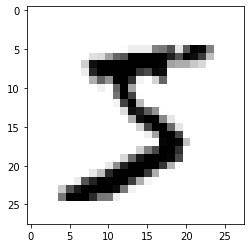

In [200]:
from PIL import Image
import matplotlib.pyplot as plt

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

def img_show1(img):
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()
    
img = x_train[0]
label = t_train[0]
print(label)

#img_show(img)
img_show1(img)

본 신경망은 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성한다.
한편 은닉층은 총 두개로
첫번째 은닉층에서는 50개의 뉴런을 
두번째 은닉층에서는 100개의 뉴런을 배치 할 것이다.
50과 100은 임의로 정한 값이다.

이제 순서대로 작업을 처리해줄 get_data, init_network,predict를 정의 할것이다.

In [201]:
from keras.datasets import mnist
import pickle

def get_data():
    (x_train, t_train),(x_test,t_test) = mnist.load_data()
    return x_test, t_test

def init_network():
    with open("/Users/bandaejun/Desktop/GLC/study/sample_weight.pkl",'rb') as f:
        network = pickle.load(f)
    return network

def predict(network,x):
    W1,W2,W3 = network['W1'],network['W2'],network['W3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']

    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = softmax(a3)
    
    return y

x,t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network,x[i].reshape(784,))
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt+=1
print(f'Accuracy : {float(accuracy_cnt) / len(x)}')    

#sigmoid에서 발생하는 overflow를 해결할 수 가 없음 흠

/var/folders/zm/91nct82j02j0xmt1jpbd7xrc0000gn/T/ipykernel_79524/1954472426.py:2: RuntimeWarning: overflow encountered in exp
  sig = np.where(x<0,np.exp(x)/(1+np.exp(x)) ,1/(1+np.exp(-x)))
/var/folders/zm/91nct82j02j0xmt1jpbd7xrc0000gn/T/ipykernel_79524/1954472426.py:2: RuntimeWarning: invalid value encountered in true_divide
  sig = np.where(x<0,np.exp(x)/(1+np.exp(x)) ,1/(1+np.exp(-x)))


Accuracy : 0.9207


현재는 다음과 같이 흐름이 진행되고 있다.
x  : 001 784
w1 : 784 050
w2 : 050 100
w3 : 100 010
y  : 10

그럼 이제 여러장을 한꺼번에 입력하는 경우를 생각해보자.
이미지 100개를 묶어 predict함수에 한번에 넘기는 것이다.
x의 형상을 100 784로 바꿔 넣는것이다.
이처럼 하나로 묶은 입력 데이터를 배치라고 한다.

이제 구현해보자

In [202]:
x,t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0,len(x),batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network,x_batch.reshape(batch_size,784))
    p = np.argmax(y_batch,axis = 1)
    accuracy_cnt+=np.sum(p == t[i:i+batch_size])

print(f'Accuracy : {float(accuracy_cnt) / len(x)}')  

Accuracy : 0.9207


/var/folders/zm/91nct82j02j0xmt1jpbd7xrc0000gn/T/ipykernel_79524/1954472426.py:2: RuntimeWarning: overflow encountered in exp
  sig = np.where(x<0,np.exp(x)/(1+np.exp(x)) ,1/(1+np.exp(-x)))
/var/folders/zm/91nct82j02j0xmt1jpbd7xrc0000gn/T/ipykernel_79524/1954472426.py:2: RuntimeWarning: invalid value encountered in true_divide
  sig = np.where(x<0,np.exp(x)/(1+np.exp(x)) ,1/(1+np.exp(-x)))


여기나오는 argmax의 axis = 1에 대하여 이해해보자.
argmax는 최댓값의 인덱스를 가져온다. 다만 여기에서 axis = 1은 배열중 1번째 차원을 구성하는 각원소에서 최댓값 인덱스를 찾도록 한것이다.
예시를 보며 이해해보도록 하자

In [203]:
x = np.array([[0.1,0.8,0.1],[0.3,0.1,0.6],[0.2,0.5,0.3],[0.8,0.1,0.1]])
y = np.argmax(x,axis = 1)
print(y)

[1 2 1 0]
